In [101]:
import pandas as pd
import re
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
plt.style.use('./deeplearning.mplstyle')
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

RANDOM_STATE = 42

In [102]:
df = pd.read_csv("sample2_malicious_url.csv")
# df.head()

# df = df.head(5000) 

In [103]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['type'])

In [104]:
# Exclude the target column
features = [x for x in df.columns if x != 'type']  # Exclude 'type' column
print(len(features))

8


In [105]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.3, random_state=42)

print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 3500
validation samples: 1500
target proportion: 0.4006


In [106]:
# Building random forest tree 
# min_samples_split: The minimum number of samples required to split an internal ndoe
# max_depth: The maximum depth of the tree
# An additionaly hyperparameter for Random Forest is called n_estimators, which is the 
# number of Decision Tress that make up the Random Forest

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

min_samples_split=2, Train Accuracy=0.9989, Validation Accuracy=0.9447
min_samples_split=10, Train Accuracy=0.9726, Validation Accuracy=0.9373
min_samples_split=30, Train Accuracy=0.9451, Validation Accuracy=0.9227
min_samples_split=50, Train Accuracy=0.9326, Validation Accuracy=0.9160
min_samples_split=100, Train Accuracy=0.9186, Validation Accuracy=0.9060
min_samples_split=200, Train Accuracy=0.8957, Validation Accuracy=0.8873
min_samples_split=300, Train Accuracy=0.8837, Validation Accuracy=0.8740
min_samples_split=700, Train Accuracy=0.8611, Validation Accuracy=0.8480


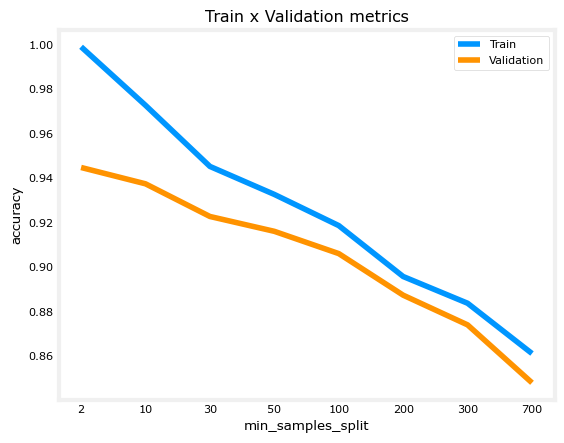

In [107]:
# Min Samples Split

accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:

    model = RandomForestClassifier(min_samples_split=min_samples_split,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"min_samples_split={min_samples_split}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks= range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Validation'])

max_depth=1, Train Accuracy=0.7963, Validation Accuracy=0.7833
max_depth=2, Train Accuracy=0.8229, Validation Accuracy=0.8060
max_depth=3, Train Accuracy=0.8603, Validation Accuracy=0.8433
max_depth=4, Train Accuracy=0.8900, Validation Accuracy=0.8753
max_depth=8, Train Accuracy=0.9449, Validation Accuracy=0.9193
max_depth=16, Train Accuracy=0.9989, Validation Accuracy=0.9453
max_depth=32, Train Accuracy=0.9989, Validation Accuracy=0.9447
max_depth=64, Train Accuracy=0.9989, Validation Accuracy=0.9447
max_depth=None, Train Accuracy=0.9989, Validation Accuracy=0.9447


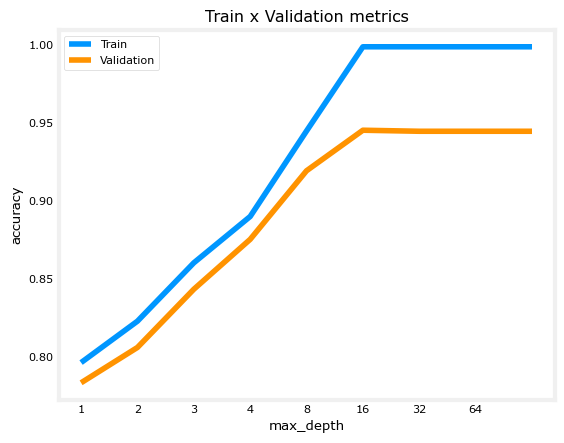

In [108]:
# Max depth

accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:

    model = RandomForestClassifier(max_depth=max_depth,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"max_depth={max_depth}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

plt.legend(['Train','Validation'])

n_estimators=10, Train Accuracy=0.9963, Validation Accuracy=0.9347
n_estimators=50, Train Accuracy=0.9989, Validation Accuracy=0.9447
n_estimators=100, Train Accuracy=0.9989, Validation Accuracy=0.9447
n_estimators=500, Train Accuracy=0.9989, Validation Accuracy=0.9453


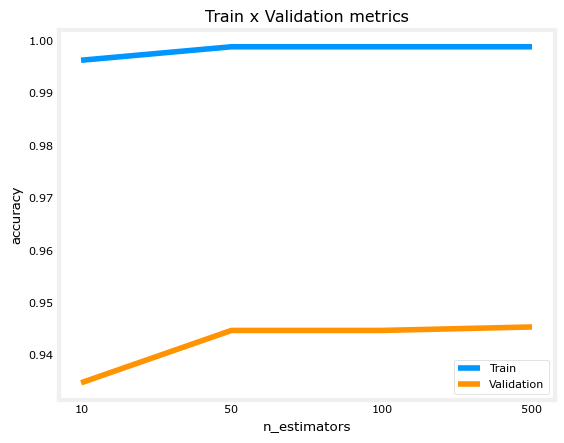

In [109]:
# N Estimators

accuracy_list_train = []
accuracy_list_val = []

for n_estimators in n_estimators_list:

    model = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"n_estimators={n_estimators}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [110]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 16, 
                                             min_samples_split = 10).fit(X_train,y_train)

In [111]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9717
Metrics test:
	Accuracy score: 0.9387


In [112]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [113]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [114]:
# eval_set = [(X_train_eval,y_train_eval)]:Here we must pass a list to the eval_set, because you can have several different tuples ov eval sets.
# early_stopping_rounds: This parameter helps to stop the model training if its evaluation metric is no longer improving on the validation set. It's set to 10.

# This code builds and trains a smart model to make predictions, and it tries to avoid overfitting by stopping early if the model stops improving.
# xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds = 15)
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-mlogloss:1.22650
[1]	validation_0-mlogloss:1.09751
[2]	validation_0-mlogloss:0.99090
[3]	validation_0-mlogloss:0.89966
[4]	validation_0-mlogloss:0.82143
[5]	validation_0-mlogloss:0.75381
[6]	validation_0-mlogloss:0.69525
[7]	validation_0-mlogloss:0.64420
[8]	validation_0-mlogloss:0.59758
[9]	validation_0-mlogloss:0.55681
[10]	validation_0-mlogloss:0.52046
[11]	validation_0-mlogloss:0.48858
[12]	validation_0-mlogloss:0.46076
[13]	validation_0-mlogloss:0.43460
[14]	validation_0-mlogloss:0.41243
[15]	validation_0-mlogloss:0.39243
[16]	validation_0-mlogloss:0.37305
[17]	validation_0-mlogloss:0.35583
[18]	validation_0-mlogloss:0.34027
[19]	validation_0-mlogloss:0.32678
[20]	validation_0-mlogloss:0.31331
[21]	validation_0-mlogloss:0.30211
[22]	validation_0-mlogloss:0.29224
[23]	validation_0-mlogloss:0.28291
[24]	validation_0-mlogloss:0.27484
[25]	validation_0-mlogloss:0.26662
[26]	validation_0-mlogloss:0.25869
[27]	validation_0-mlogloss:0.25147
[28]	validation_0-mlogloss:0.2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [115]:
# xgb_model.best_iteration

In [116]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9863
Metrics test:
	Accuracy score: 0.9440


In [117]:
# These are the number of times the model correctly predicted the class for each actual class.
# Correct Predictions (diagonal elements)
# Class 0 is predicted very accurately (138 correct, only 3 misclassifications as Class 1).
# Class 1 has some misclassifications (5 as Class 0 and 2 as Class 3), but overall, it has a strong performance (36 correct).
# Class 2 seems to be harder for the model to predict correctly, with several misclassifications into other classes (particularly Classes 0 and 1).
# Class 3 also has misclassifications, but it is predicted correctly 6 times, while 3 instances are misclassified as Class 1.

cm = confusion_matrix(y_test, xgb_model.predict(X_test))
print(cm)

[[1081   14    5    1]
 [  15  243    2    3]
 [   7   11   18    9]
 [   5   10    2   74]]


In [118]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1101
           1       0.87      0.92      0.90       263
           2       0.67      0.40      0.50        45
           3       0.85      0.81      0.83        91

    accuracy                           0.94      1500
   macro avg       0.84      0.78      0.80      1500
weighted avg       0.94      0.94      0.94      1500



In [119]:
cv_score = cross_val_score(xgb_model, X_test, y_test, cv=5)
print(f'Cross-Validation Score: {cv_score}')
print(f'Mean CV Score: {cv_score.mean()}')

Cross-Validation Score: [0.93       0.94333333 0.93666667 0.93666667 0.92      ]
Mean CV Score: 0.9333333333333333
